In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

<ipython-input-29-9781e2edc26e>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

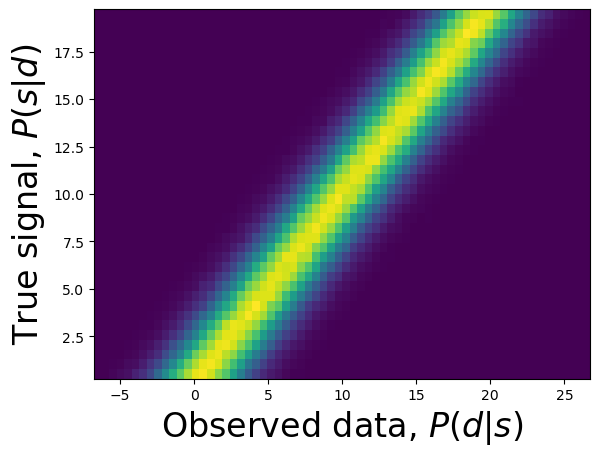

In [29]:
bkgd = stats.norm.rvs(loc = 0, scale = 2, size = 1000000)
signal = np.random.uniform(0,20,1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

P(d|s) is plotted along the x-axis in the above plot. I will use the technique discussed in lecture to plot the injected signal. If we select a true signal of 10, this will be the mean of the normal distribution of the injected signal.

Text(0.5, 0, 'Observed Data P(d|s)')

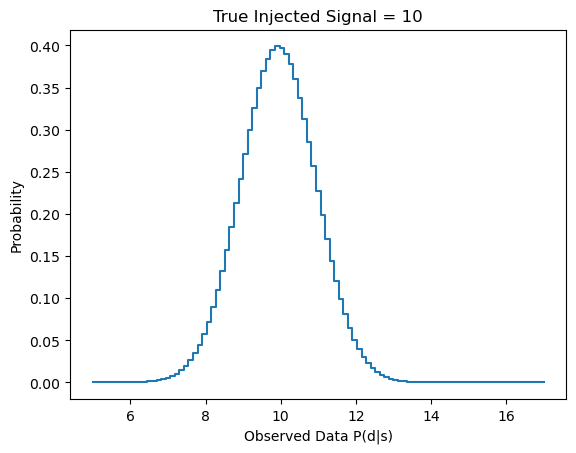

In [30]:
fig, ax = plt.subplots(1,1)
x = np.linspace(5,17,100)
#ax.step(x,stats.norm.pdf(x,loc = 7, scale = 1),linewidth = 3)
ax.step(x,norm.pdf(x,loc=10))
ax.set_title('True Injected Signal = 10')
ax.set_ylabel('Probability')
ax.set_xlabel('Observed Data P(d|s)')

This plot gives the probability that we get particular data reading using true signal of 10.

Text(0.5, 0, 'True Signal P(s|d)')

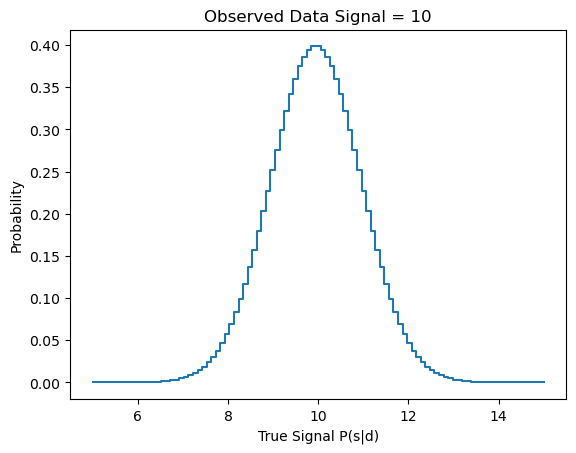

In [31]:
fig, ax = plt.subplots(1,1)
x = np.linspace(5,15,100)
#ax.step(x,stats.norm.pdf(x,loc = 7, scale = 1),linewidth = 3)
ax.step(x,norm.pdf(x,loc=10))
ax.set_title('Observed Data Signal = 10')
ax.set_ylabel('Probability')
ax.set_xlabel('True Signal P(s|d)')

This plot shows the probability of getting a certain true signal given observed data of 10

Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above. Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.

<ipython-input-32-30326b886394>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

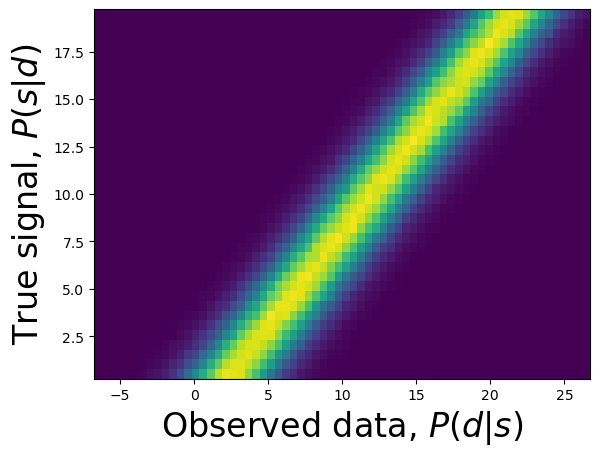

In [32]:
bkgd = stats.norm.rvs(loc = 2, scale = 2, size = 1000000)
signal = np.random.uniform(0,20,1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

This is very similar except now the mean is nonzero. The standard deviation is kept the same. I will use the same data value. Let's first plot P(d|s)

Text(0.5, 0, 'Observed Data P(d|s)')

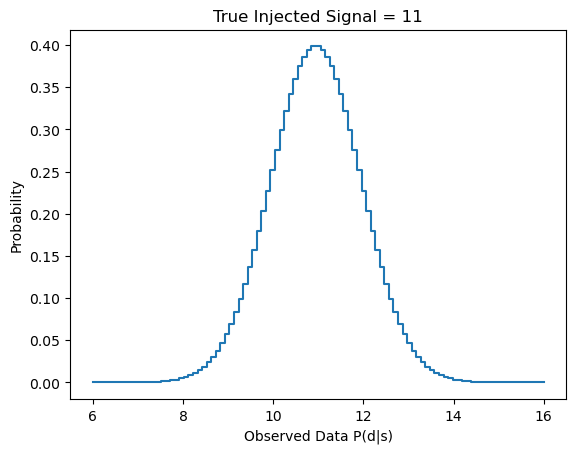

In [35]:
fig, ax = plt.subplots(1,1)
x = np.linspace(6,16,100)
#ax.step(x,stats.norm.pdf(x,loc = 7, scale = 1),linewidth = 3)
ax.step(x,norm.pdf(x,loc=11))
ax.set_title('True Injected Signal = 11')
ax.set_ylabel('Probability')
ax.set_xlabel('Observed Data P(d|s)')

In [ ]:
now we plot P(s|d)

Text(0.5, 0, 'True Signal P(s|d)')

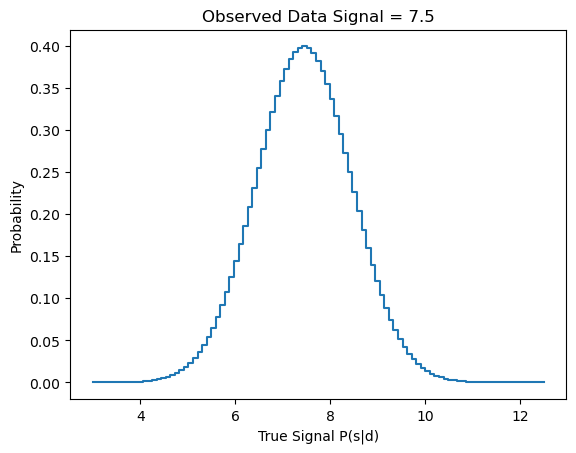

In [37]:
fig, ax = plt.subplots(1,1)
x = np.linspace(3,12.5,100)
#ax.step(x,stats.norm.pdf(x,loc = 7, scale = 1),linewidth = 3)
ax.step(x,norm.pdf(x,loc=7.5))
ax.set_title('Observed Data Signal = 7.5')
ax.set_ylabel('Probability')
ax.set_xlabel('True Signal P(s|d)')

Let's now overplot the above plots to analyze the differences

(3.0, 18.0)

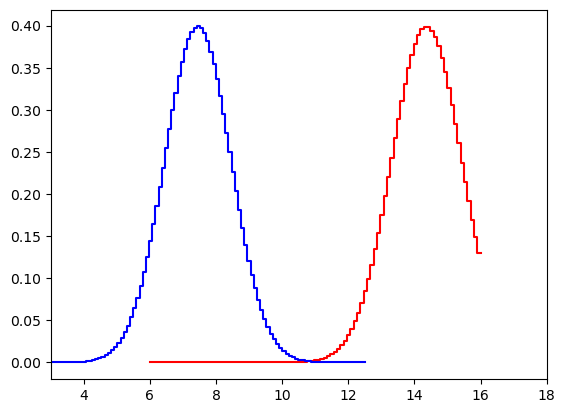

In [39]:
fig,ax = plt.subplots(1,1)
x1 = np.linspace(6,16,100)
ax.step(x1,norm.pdf(x,loc=11),color='red')
x2 = np.linspace(3,12.5,100)
ax.step(x2,norm.pdf(x,loc=7.5),color='blue')
plt.xlim([3,18])

The plots are not centered on the same value because the 2d histogram above was shifted. When the mean was at 0, the plot would have been centered because the two sides of the histogram are equal. Now that the mean of the normal distribtion was shifted, the two sides are not equal anymore so the the plots are not centered.